In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [6]:
retail= pd.read_csv('retail_clean.csv')

In [7]:
retail.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'WHITE HANGING HEART T-LIGHT HOLDER'),
  Text(1, 0, 'REGENCY CAKESTAND 3 TIER'),
  Text(2, 0, 'ASSORTED COLOUR BIRD ORNAMENT'),
  Text(3, 0, 'JUMBO BAG RED RETROSPOT'),
  Text(4, 0, 'PARTY BUNTING'),
  Text(5, 0, 'LUNCH BAG  BLACK SKULL.'),
  Text(6, 0, 'REX CASH+CARRY JUMBO SHOPPER'),
  Text(7, 0, 'LUNCH BAG SPACEBOY DESIGN '),
  Text(8, 0, 'STRAWBERRY CERAMIC TRINKET BOX'),
  Text(9, 0, 'HOME BUILDING BLOCK WORD')])

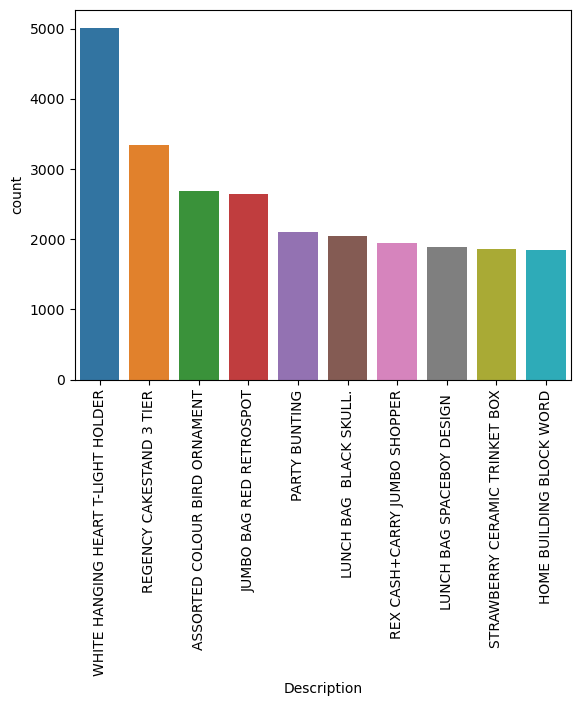

In [8]:
sns.countplot(x='Description',data= retail,order= retail['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

In [9]:
order_size= retail.groupby(['Invoice'])['Description'].size().reset_index()

In [10]:
order_size.describe()

,Invoice,Description
count,36975.000000,36975.000000
mean,536561.752265,21.081677
std,26580.252535,22.964145
min,489434.000000,1.000000
25%,513877.000000,6.000000
50%,536437.000000,15.000000
75%,559882.000000,27.000000
max,581587.000000,542.000000


<AxesSubplot:ylabel='Description'>

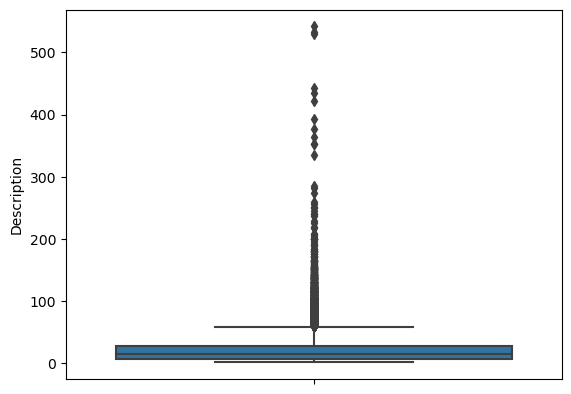

In [11]:
sns.boxplot(y='Description',data= order_size)

In [12]:
invoice_desc_count= retail.groupby(['Invoice','Description']).size().reset_index(name='count')

In [13]:
invoice_desc_count.head()

,Invoice,Description,count
0,489434,WHITE CHERRY LIGHTS,1
1,489434,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1
2,489434,FANCY FONT HOME SWEET HOME DOORMAT,1
3,489434,PINK CHERRY LIGHTS,1
4,489434,PINK DOUGHNUT TRINKET POT,1


In [14]:
baskets= (invoice_desc_count.groupby(['Invoice','Description'])['count'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))

In [15]:
baskets

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
baskets

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
def enc(x):
    if x <= 0:
        return 0
    if x >=1 :
        return 1
baskts_encoded= baskets.applymap(enc)

In [ ]:
baskts_encoded

In [15]:
frequent_itemsets= apriori(baskts_encoded,min_support=0.009,use_colnames=True)
rules= association_rules(frequent_itemsets,metric='lift')
rules.sort_values('confidence',ascending=False ,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
518,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568
536,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.009953,0.025233,0.009033,0.907609,35.968737,0.008782,10.550416
463,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746
458,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055
383,(POPPY'S PLAYHOUSE LIVINGROOM ),(POPPY'S PLAYHOUSE KITCHEN),0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778


In [16]:
a= retail.groupby('Description')['Quantity'].sum().reset_index()

In [17]:
a['cut']= pd.qcut(a['Quantity'],8,labels=False)
a['Bins']= pd.qcut(a['Quantity'],8,labels=None)

In [18]:
a

,Description,Quantity,cut,Bins
0,DOORMAT UNION JACK GUNS AND ROSES,167,2,"(90.0, 247.0]"
1,3 STRIPEY MICE FELTCRAFT,662,4,"(516.0, 995.0]"
2,4 PURPLE FLOCK DINNER CANDLES,324,3,"(247.0, 516.0]"
3,50'S CHRISTMAS GIFT BAG LARGE,1885,6,"(1838.5, 3910.0]"
4,ANIMAL STICKERS,385,3,"(247.0, 516.0]"
...,...,...,...,...
5278,ZINC T-LIGHT HOLDER STARS SMALL,4894,7,"(3910.0, 105185.0]"
5279,ZINC TOP 2 DOOR WOODEN SHELF,242,2,"(90.0, 247.0]"
5280,ZINC WILLIE WINKIE CANDLE STICK,6166,7,"(3910.0, 105185.0]"
5281,ZINC WIRE KITCHEN ORGANISER,25,1,"(24.0, 90.0]"


In [19]:
slow_moving= np.unique(a[a.cut==6].Description)

In [20]:
slow_moving

array([" 50'S CHRISTMAS GIFT BAG LARGE", ' DOLLY GIRL BEAKER',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' WHITE CHERRY LIGHTS',
       '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY',
       '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '200 RED + WHITE BENDY STRAWS', '3 HOOK HANGER MAGIC GARDEN',
       '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 PIECE SPACEBOY COOKIE CUTTER SET', '36 DOILIES DOLLY GIRL',
       '36 FOIL HEART CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D TRADITIONAL CHRISTMAS STICKERS',
       '3D VINTAGE CHRISTMAS STICKERS ',
       '6 CHOCOLATE LOVE HEART T-LIGHTS', "6 GIFT TAGS 50'S CHRISTMAS ",
       '6 GIFT TAGS VINTAGE CHRISTMAS ', '6 RIBBONS ELEGANT CHRISTMAS ',
       '6 RIBBONS EMPIRE  ', '6 ROCKET BALLOONS ',
       '75 GREEN FAIRY CAKE CASES', 'ABC TREASURE BOOK BOX ',


In [21]:
len(slow_moving)

660

In [22]:
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")


In [23]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
518,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568
536,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.009953,0.025233,0.009033,0.907609,35.968737,0.008782,10.550416
463,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.016146,0.025233,0.014415,0.892797,35.381759,0.014008,9.092746
458,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.011521,0.025233,0.010223,0.887324,35.164848,0.009932,8.651055
383,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778
...,...,...,...,...,...,...,...,...,...
421,WHITE HANGING HEART T-LIGHT HOLDER,VICTORIAN GLASS HANGING T-LIGHT,0.132197,0.038999,0.009980,0.075491,1.935700,0.004824,1.039471
138,WHITE HANGING HEART T-LIGHT HOLDER,HANGING HEART ZINC T-LIGHT HOLDER,0.132197,0.030859,0.009953,0.075286,2.439715,0.005873,1.048045
319,WHITE HANGING HEART T-LIGHT HOLDER,LUNCH BAG SPACEBOY DESIGN,0.132197,0.050683,0.009817,0.074264,1.465258,0.003117,1.025472
79,WHITE HANGING HEART T-LIGHT HOLDER,COOK WITH WINE METAL SIGN,0.132197,0.033130,0.009249,0.069967,2.111869,0.004870,1.039608


In [24]:
slow_moving

array([" 50'S CHRISTMAS GIFT BAG LARGE", ' DOLLY GIRL BEAKER',
       ' SET 2 TEA TOWELS I LOVE LONDON ', ' WHITE CHERRY LIGHTS',
       '12 IVORY ROSE PEG PLACE SETTINGS',
       '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCILS TALL TUBE RED RETROSPOT',
       '12 PENCILS TALL TUBE RED SPOTTY',
       '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
       '200 RED + WHITE BENDY STRAWS', '3 HOOK HANGER MAGIC GARDEN',
       '3 HOOK PHOTO SHELF ANTIQUE WHITE',
       '3 PIECE SPACEBOY COOKIE CUTTER SET', '36 DOILIES DOLLY GIRL',
       '36 FOIL HEART CAKE CASES', '36 PENCILS TUBE RED SPOTTY',
       '36 PENCILS TUBE SKULLS', '36 PENCILS TUBE WOODLAND',
       '3D TRADITIONAL CHRISTMAS STICKERS',
       '3D VINTAGE CHRISTMAS STICKERS ',
       '6 CHOCOLATE LOVE HEART T-LIGHTS', "6 GIFT TAGS 50'S CHRISTMAS ",
       '6 GIFT TAGS VINTAGE CHRISTMAS ', '6 RIBBONS ELEGANT CHRISTMAS ',
       '6 RIBBONS EMPIRE  ', '6 ROCKET BALLOONS ',
       '75 GREEN FAIRY CAKE CASES', 'ABC TREASURE BOOK BOX ',


In [26]:
rules[rules.consequents.isin(slow_moving)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
518,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.010331,0.016660,0.009574,0.926702,55.624660,0.009402,13.415568
383,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.016660,0.011034,0.886957,53.238989,0.010827,8.698778
517,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,0.011034,0.015037,0.009574,0.867647,57.700090,0.009408,7.441941
379,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,0.015037,0.016660,0.012765,0.848921,50.955924,0.012515,6.508775
380,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE BEDROOM,0.012441,0.015037,0.010331,0.830435,55.225407,0.010144,5.808755
521,POPPY'S PLAYHOUSE LIVINGROOM,POPPY'S PLAYHOUSE KITCHEN,0.012441,0.012765,0.009574,0.769565,60.285326,0.009415,4.284226
378,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE BEDROOM,0.016660,0.015037,0.012765,0.766234,50.955924,0.012515,4.213452
516,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE LIVINGROOM,0.012765,0.012441,0.009574,0.750000,60.285326,0.009415,3.950237
381,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE LIVINGROOM,0.015037,0.012441,0.010331,0.687050,55.225407,0.010144,3.155649
382,POPPY'S PLAYHOUSE KITCHEN,POPPY'S PLAYHOUSE LIVINGROOM,0.016660,0.012441,0.011034,0.662338,53.238989,0.010827,2.924694
